In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm

from xgcm import Grid

Text(0.5, 1.0, 'MOM_IC h')

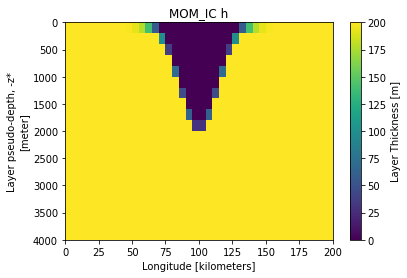

In [2]:
IC = xr.open_dataset('MOM_IC.nc')
IC.h.isel(lath = 0).plot(yincrease = False)
plt.title('MOM_IC h')

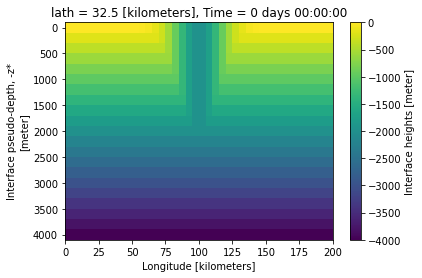

In [3]:
IC.eta.isel(lath = 0).plot(yincrease = False)

In [4]:
# mid_point_v2 = IC.eta.isel(lath = 0).sel(Interface = slice(1,10000)) + IC.h.isel(lath = 0).values/2
# mid_point_v2.plot(yincrease = False)
# plt.show()

# (mid_point_v2-z_mid.values).plot(yincrease = False)


In [5]:
#z_surf.values[0,20]


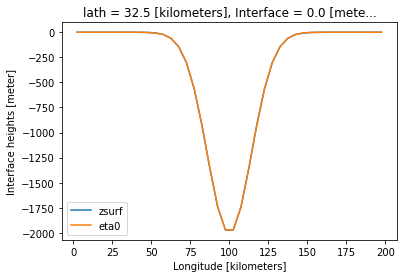

In [6]:
IC = xr.open_dataset('MOM_IC.nc')
z_surf = IC.h.isel(lath = 0).sum('Layer')-4000
z_surf.plot(label = 'zsurf')
eta0 = IC.eta.isel(lath = 0).isel(Interface = 0)
eta0.plot(label = 'eta0')
plt.legend()

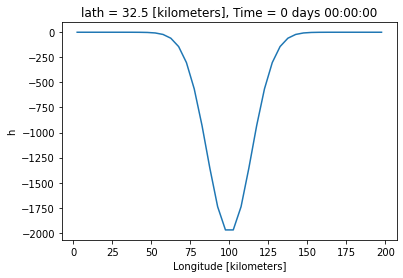

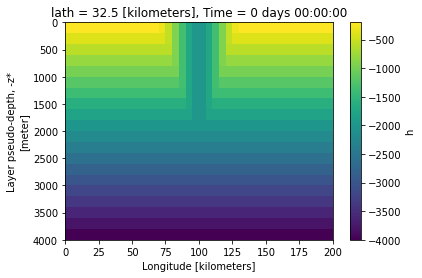

Text(0.5, 1.0, 'z mid')

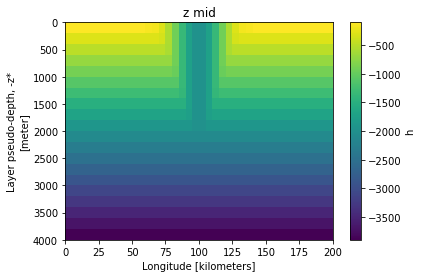

In [7]:
IC = xr.open_dataset('MOM_IC.nc')
z_surf = IC.h.isel(lath = 0).sum('Layer')-4000
z_surf.plot()
plt.show()
z_bot = -IC.h.isel(lath = 0).cumsum('Layer')+z_surf
z_bot.plot(yincrease = False)
plt.show()
z_mid = z_bot+IC.h.isel(lath = 0)/2
z_mid.plot(yincrease = False)
plt.title('z mid')

Text(0.5, 1.0, 'Salt calculated from z and linearity')

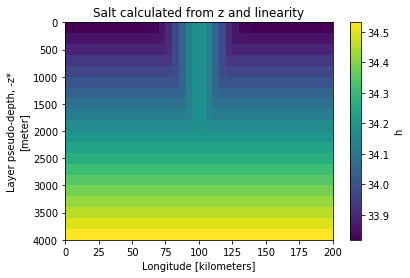

In [8]:
(z_mid*(34.55-33.8)/(-4000) + 33.8).plot(yincrease = False)
plt.title('Salt calculated from z and linearity')

Text(0.5, 1.0, 'MOM_IC Salt')

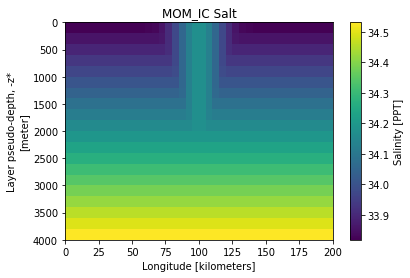

In [9]:
IC = xr.open_dataset('MOM_IC.nc')
IC.Salt.isel(lath = 0).plot(yincrease = False)
plt.title('MOM_IC Salt')

Text(0.5, 1.0, 'MOM_IC Salt Error with TRIMING_USES_REMAPPING ')

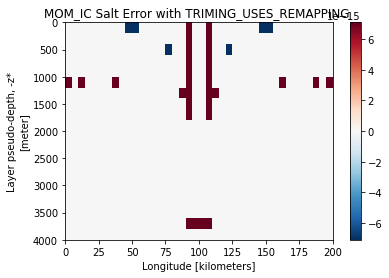

In [10]:
IC = xr.open_dataset('MOM_IC.nc')
ideal_salt = (z_mid*(34.55-33.8)/(-4000) + 33.8)
(IC.Salt.isel(lath = 0)-ideal_salt).plot(yincrease = False)
plt.title('MOM_IC Salt Error with TRIMING_USES_REMAPPING ')

In [11]:
(34.137500000000010 -33.8)/(34.55-33.8)*4000

1800.0000000000682

## now investigate if pressure is accurate

Analytically, we expect the pressure at the location of ice shelf draft to be proportional to the volume of water displaced, following Archimedes. 

$$\rho_{ice} g H_{thick} = g \int_0^z \rho(z') dz'$$

The stratification is linear with depth $$\rho = \rho_0(1+\alpha(T(z)-T_0) + \beta(S(z)-S_0))$$ and $$S(z) = S_{top} + z\frac{(S_{bot}-S_{top})}{H}$$

i.e. with $\alpha = 0$ and $S_0 = 0$ (see parameters):

$$\rho_{ice} g H_{thick} = g \int_0^z \rho_0\left(1+\beta\left(S_{top} + z'\frac{(S_{bot}-S_{top})}{H} \right) \right) dz'$$


The integral is 

$$\rho_{ice} g H_{thick} = g \left[\rho_0z' + \rho_0\beta\left(S_{top}z' + \frac{z'^2}{2}\frac{(S_{bot}-S_{top})}{H} \right) \right]_0^z = g\rho_0 \left(z + \beta\left(S_{top}z + \frac{z^2}{2}\frac{(S_{bot}-S_{top})}{H} \right) \right)$$



with 
- $\rho_0 = 1000.0$ (`RHO_T0_S0`), 
- $\beta = 1.0/\rho_0$ (`DRHO_DS`),
- $\alpha = 0$ (`DRHO_DT`), 
- $S_0 =T_0 = 0$ (since we use $\rho_0$ to be at S=0 in `RHO_T0_S0`), 
- $\rho_{ice} = 900 $ (`DENSITY_ICE`), 
- $H = 4000$ (`MAXIMUM_DEPTH`), 
- $S_{top} = 33.8$ (`ISOMIP_S_SUR`), 
- $S_{bot} = 34.55$ (`ISOMIP_S_BOT`), 
- $T_{top} = T_{bot} = -1.9$ (`ISOMIP_T_SUR`,`ISOMIP_T_BOT`)
- $g$ = 9.8 (`G_EARTH`)

The pressure applied using `TRIM_IC_FOR_P_SURF = True` is `SURFACE_PRESSURE_SCALE = 8820.0`$\times H_{thick}$ where 8820 = $g\rho_{ice}$

Therefore, given applied pressure, we should expect the depth of the interface (i.e. uppermost e value) to be the solution to this quadratic equation:

$$\rho_{ice} g H_{thick} = g\rho_0 \left(z + \beta\left(S_{top}z + \frac{z^2}{2}\frac{(S_{bot}-S_{top})}{H} \right) \right)$$

Since I will probably make a mistake rearranging this, let's just compute the LHS and RHS:

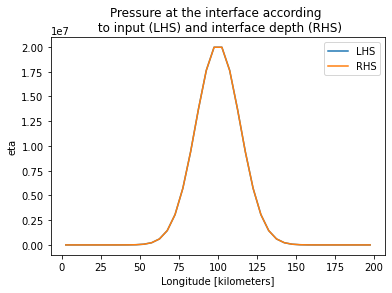

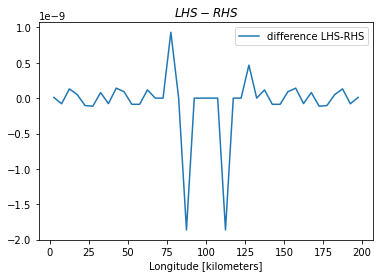

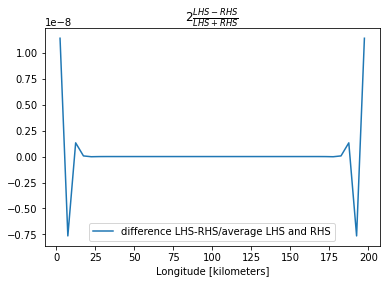

interface z values [9.55554356e-08 1.02731440e-06 9.74688854e-06 8.16096988e-05
 6.03018641e-04 3.93217548e-03 2.26281075e-02 1.14915011e-01
 5.15013330e-01 2.03691695e+00 7.10953548e+00 2.18988816e+01
 5.95271288e+01 1.42797080e+02 3.02297049e+02 5.64751798e+02
 9.31087372e+02 1.35467210e+03 1.73937274e+03 1.97092614e+03
 1.97092614e+03 1.73937274e+03 1.35467210e+03 9.31087372e+02
 5.64751798e+02 3.02297049e+02 1.42797080e+02 5.95271288e+01
 2.18988816e+01 7.10953548e+00 2.03691695e+00 5.15013330e-01
 1.14915011e-01 2.26281075e-02 3.93217548e-03 6.03018641e-04
 8.16096988e-05 9.74688854e-06 1.02731440e-06 9.55554356e-08]


In [5]:
H_thick = xr.open_dataset('INPUT/fatseamountice.nc').D
(8820*H_thick).isel(lath = 0).plot(label = 'LHS')

g = 9.8
rho_0 = 1000
z = -xr.open_dataset('MOM_IC.nc').eta.isel(Interface = 0, lath = 0, Time = 0)
S_top = 33.8
S_bot = 34.55
H = 4000
beta = 1.0

RHS = g*rho_0*(z + beta/rho_0*((S_top*z)+(z**2/2)*(S_bot-S_top)/H))

(RHS).plot(label = 'RHS')
plt.title('Pressure at the interface according \n to input (LHS) and interface depth (RHS)')

plt.legend()
plt.show()

((8820*H_thick).isel(lath = 0)-RHS).plot(label = 'difference LHS-RHS')
plt.legend()
plt.title('$LHS-RHS$')
plt.show()

(2*((8820*H_thick).isel(lath = 0)-RHS)/(((8820*H_thick).isel(lath = 0)+RHS))).plot(label = 'difference LHS-RHS/average LHS and RHS')
plt.legend()
plt.title(r'$2\frac{LHS-RHS}{LHS+RHS}$')
plt.show()

print('interface z values', z.values)

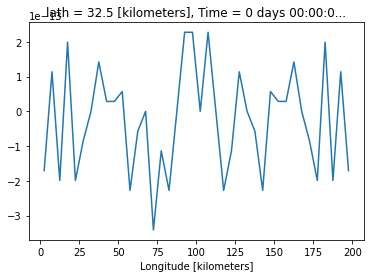

In [6]:
(xr.open_dataset('MOM_IC.nc').sfc.isel(lath = 0)+z).plot()
#.plot()

The difference plot depends on how accurate pressure is calculated in `cut_off_column_top` with the function `find_depth_of_pressure_in_cell`, controlled by `z_tol` = `TRIM_IC_Z_TOLERANCE`. Default is 1e-5, can make 1e-14 to minimise difference.

### Quadratic Eqn

Let's solve the quadratic equation to determine what $z$ should be and compare to $\eta(0)$:

$$\rho_{ice} g H_{thick} = g\rho_0 \left(z + \beta\left(S_{top}z + \frac{z^2}{2}\frac{(S_{bot}-S_{top})}{H} \right) \right)$$


$$ 0  = \frac{z^2}{2}\frac{\rho_0g\beta(S_{bot}-S_{top})}{H} + g\rho_0 (1+\beta S_{top})z - \rho_{ice} g H_{thick}  $$

The solution is 

$$z = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$$

where $a = \frac{\rho_0\beta g(S_{bot}-S_{top})}{2H}$, $b = g\rho_0 (1+\beta S_{top})$, $c = - \rho_{ice} g H_{thick}$

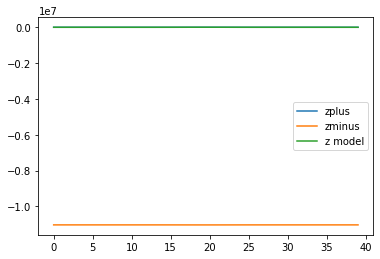

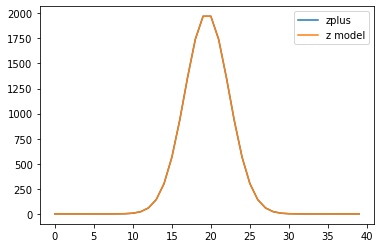

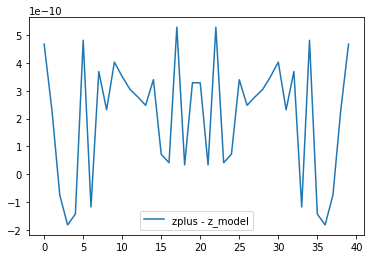

In [17]:
a = rho_0*g*(S_bot-S_top)/(2*H)*beta/rho_0
b = g*rho_0*(1+beta/rho_0*S_top)
c = -8820*H_thick.isel(lath = 0)

zplus = (-b + np.sqrt(b**2-4*a*c))/(2*a)
zminus = (-b - np.sqrt(b**2-4*a*c))/(2*a)

plt.plot(zplus, label = 'zplus')
plt.plot(zminus, label = 'zminus')
plt.plot(z, label = 'z model')
plt.legend()
plt.show()

plt.plot(zplus, label = 'zplus')
plt.plot(z, label = 'z model')
plt.legend()
plt.show()

plt.plot(zplus-z, label = 'zplus - z_model')
plt.legend()


Very small difference in thickness. Not roundoff (tolerance already as small as possible) but basically perfect.

# same process with seamount

Text(0.5, 1.0, 'MOM_IC h')

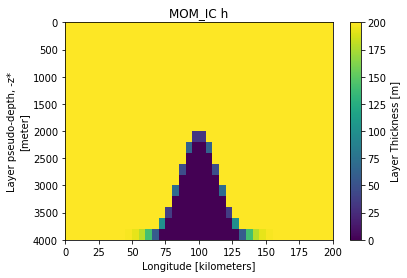

In [3]:
IC = xr.open_dataset('MOM_IC.nc')
IC.h.isel(lath = 0).plot(yincrease = False)
plt.title('MOM_IC h')

Text(0.5, 1.0, 'MOM_IC Salt')

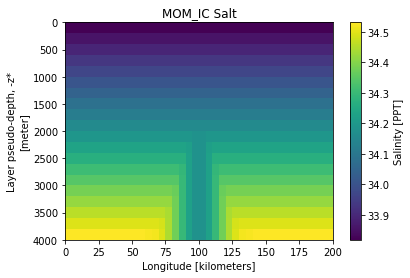

In [5]:
IC = xr.open_dataset('MOM_IC.nc')
IC.Salt.isel(lath = 0).plot(yincrease = False)
plt.title('MOM_IC Salt')

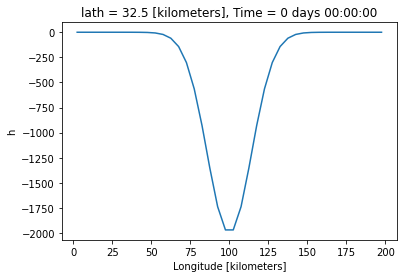

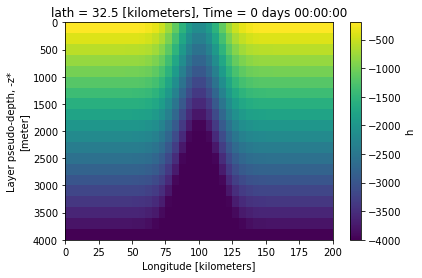

Text(0.5, 1.0, 'z mid')

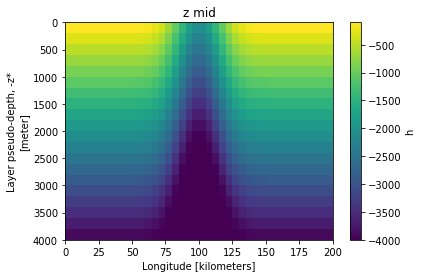

In [4]:
z_surf = IC.h.isel(lath = 0).sum('Layer')-4000
z_surf.plot()
plt.show()
z_bot = -IC.h.isel(lath = 0).cumsum('Layer')+z_surf
z_bot.plot(yincrease = False)
plt.show()
z_mid = z_bot+IC.h.isel(lath = 0)/2
z_mid.plot(yincrease = False)
plt.title('z mid')

In [4]:
def open_IC:
    IC = xr.open_dataset('MOM_IC.nc')
    return IC
def open_files:
    prog = xr.open_dataset('prog.nc')
    return prog


SyntaxError: invalid syntax (2917145392.py, line 1)

In [2]:
def plotIC(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog = open_files(label)
    ocean_static = xr.open_dataset('ocean_geometry.nc')
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
    IC = open_IC(label)
    depth = grid.interp(prog.e,"x")
    lon = ocean_static.geolonb
    dataplot = variable

    xx = lon
    if (varname == "uo") or (varname == "PFu") or (varname == "visc_rem_u"): 
        dataplot = grid.interp(dataplot,"x")
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    #print(xi.shape)
    #print(yy[tt,...].shape)
    #print(dataplot[tt,:,yy0,:].shape)
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


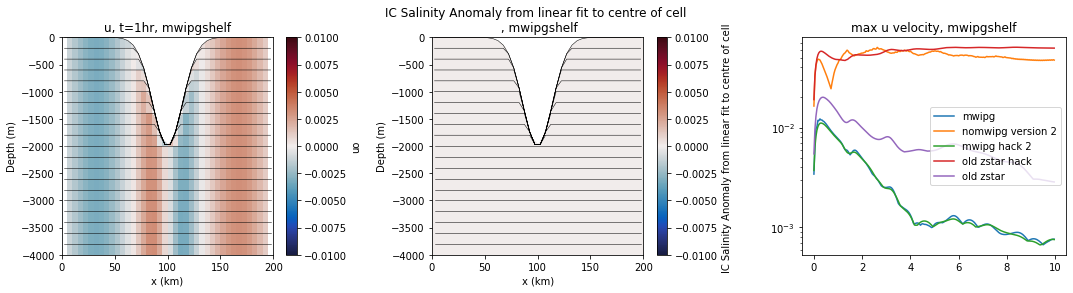

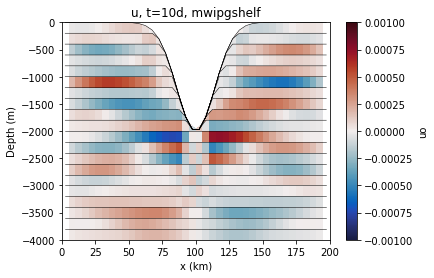

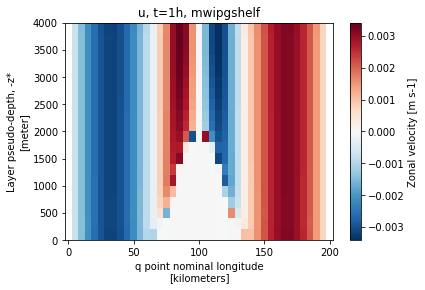

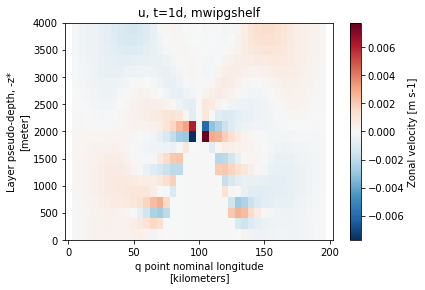

Text(0.5, 1.0, 'u, t=10d, nomwipgshelf-2')

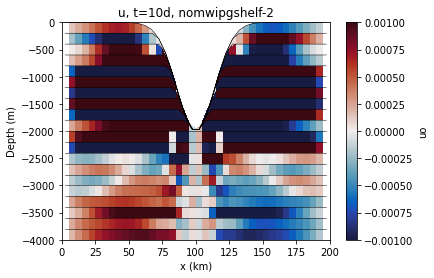

In [45]:
label = 'mwipgshelf'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.01,0.01,cm.cm.balance,ymax)
axes[0].set_title('u, t=1hr, '+label)

prog = open_files(label)
IC = open_IC(label)

#plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'mwipg')
axes[2].set_title('max u velocity, '+label)
prog2 = open_files('nomwipgshelf')
#axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'nomwipg')
prog2 = open_files('nomwipgshelf-2')
axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'nomwipg version 2')
prog2 = open_files('mwipgshelf-hack2')
axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'mwipg hack 2')
prog2 = open_filesold('zstar-hack')
axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'old zstar hack')
prog2 = open_filesold('zstar')
axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'old zstar')

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()

label = 'mwipgshelf'

fig, axes = plt.subplots()
prog = open_files(label)
IC = open_IC(label)
x = 0
time = -1#24*5-1
ymax = 4000
plot(axes,x,time,0,prog.u,"uo",-0.001,0.001,cm.cm.balance,ymax)
axes.set_title('u, t=10d, '+label)
plt.show()
fig, axes = plt.subplots()
prog.u.isel(yh = 0, Time = 0).plot(ax = axes)
axes.set_title('u, t=1h, '+label)
plt.show()
fig, axes = plt.subplots()
prog.u.isel(yh = 0, Time = 24).plot(ax = axes)
axes.set_title('u, t=1d, '+label)
plt.show()

label = 'nomwipgshelf-2'

fig, axes = plt.subplots()
prog = open_files(label)
IC = open_IC(label)
x = 0
time = -1#24*5-1
ymax = 4000
plot(axes,x,time,0,prog.u,"uo",-0.001,0.001,cm.cm.balance,ymax)
axes.set_title('u, t=10d, '+label)


No handles with labels found to put in legend.


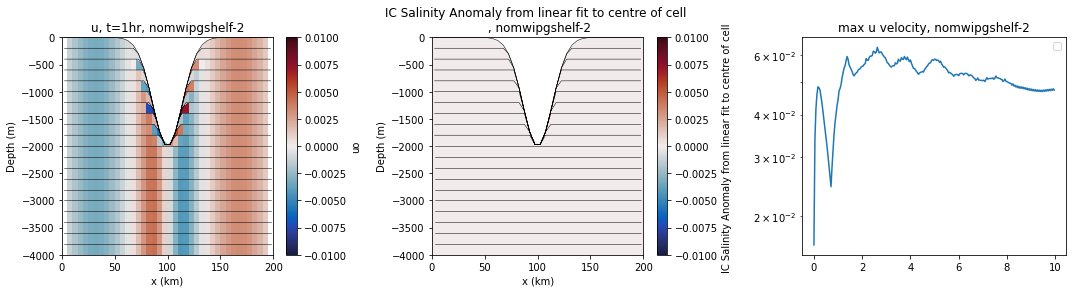

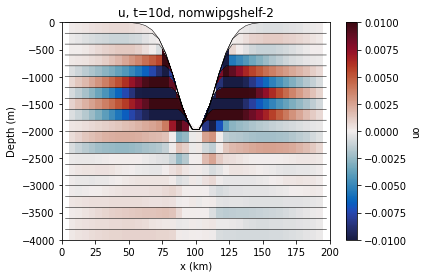

In [61]:
label = 'nomwipgshelf-2'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.01,0.01,cm.cm.balance, ymax)
axes[0].set_title('u, t=1hr, '+label)

prog = open_files(label)
IC = open_IC(label)

#plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values,)
axes[2].set_title('max u velocity, '+label)
axes[2].legend()
axes[2].set_yscale('log')

fig.subplots_adjust(wspace = 0.4)
plt.show()

label = 'nomwipgshelf-2'

fig, axes = plt.subplots()
prog = open_files(label)
IC = open_IC(label)
x = 0
time = -1#24*5-1
ymax = 4000
plot(axes,x,time,0,prog.u,"uo",-0.01,0.01,cm.cm.balance,ymax)
axes.set_title('u, t=10d, '+label)
plt.show()


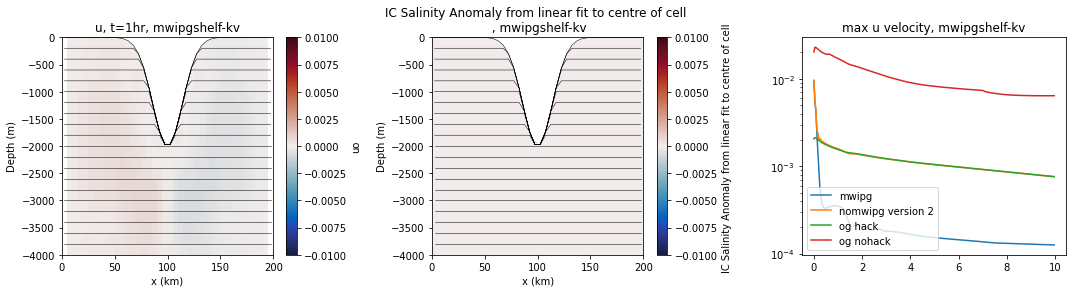

In [33]:
label = 'mwipgshelf-kv'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 5 #24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.01,0.01,cm.cm.balance,ymax)
axes[0].set_title('u, t=1hr, '+label)

prog = open_files(label)
IC = open_IC(label)
time = 0
#plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'mwipg')
axes[2].set_title('max u velocity, '+label)
prog2 = open_files('nomwipgshelf-kv')
#axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'nomwipg')
prog2 = open_files('nomwipgshelf-kv2')
axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'nomwipg version 2')
label = 'zstar-isomip-hack-drag-kvbig-symshelf_v2'
prog = open_filesold(label)
axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'og hack')
label = 'zstar-isomip-drag-kvbig-symshelf_v2'
prog = open_filesold(label)
axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'og nohack')

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)

Adding MWIPG (first version didn't set default isWeightToggle = 0) reduces max velocities by an order of magnitude. Still not seamount levels (imperfect initialization but way better - 1e-4 would be acceptable for ice shelf)

No handles with labels found to put in legend.


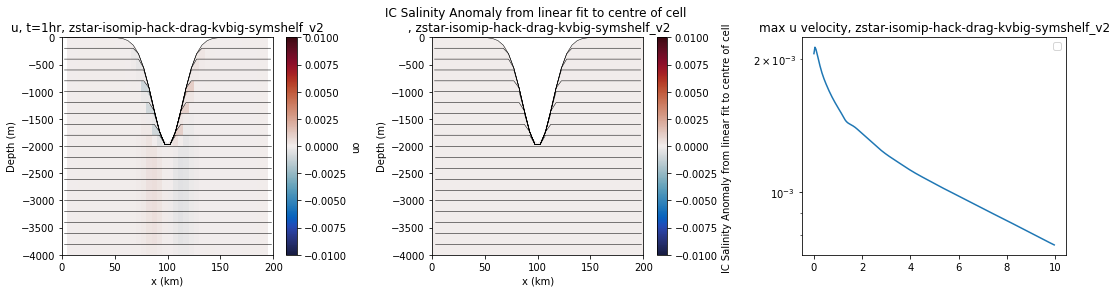

In [9]:
label = 'zstar-isomip-hack-drag-kvbig-symshelf_v2'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_filesold(label)
IC = open_ICold(label)
x = 0
time = 0#24*5-1
ymax = 4000
plotold(axes[0],x,time,0,prog.u,"uo",-0.01,0.01,cm.cm.balance, ymax)
axes[0].set_title('u, t=1hr, '+label)

#plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
plotold(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values)
axes[2].set_title('max u velocity, '+label)
axes[2].legend()
axes[2].set_yscale('log')

fig.subplots_adjust(wspace = 0.4)

In [1]:
def make_thickness_file(filename):
    
    ic = xr.open_dataset('MOM_IC.nc')
    _, nz, ny, nx = ic.h.data.shape

    new_thick = nc.Dataset(filename, "w", format="NETCDF4")
    new_thick.createDimension("nz", nz)
    new_thick.createDimension("ny", ny)
    new_thick.createDimension("nx", nx)
    new_thick.createVariable("h","f8",("nz","ny","nx"))

    new_thick["h"][:,:,:] = ic.h.data#*1035
    new_thick.close()

In [3]:
make_thickness_file('INPUT/sigma-isomip-symshelf-mwipg-nodrag.nc')

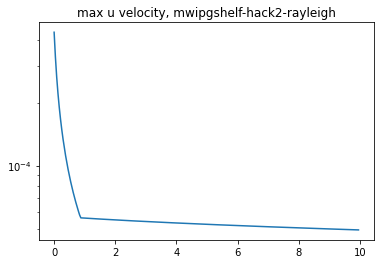

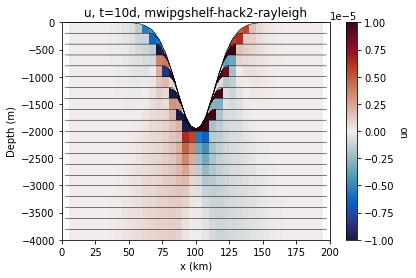

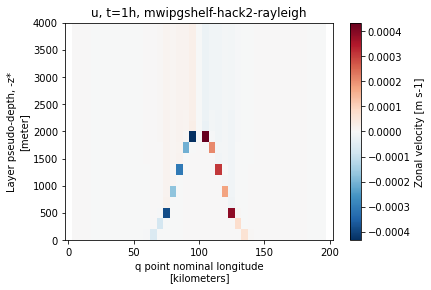

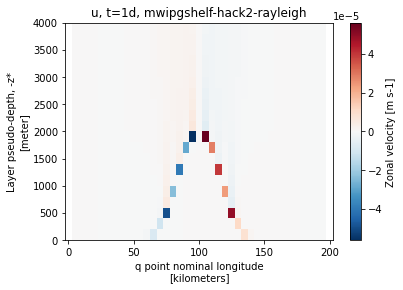

In [42]:
label = 'mwipgshelf-hack2-rayleigh'
plt.plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'mwipg')
plt.title('max u velocity, '+label)
plt.yscale('log')
plt.show()
fig, axes = plt.subplots()
prog = open_files(label)
IC = open_IC(label)
x = 0
time = -1#24*5-1
ymax = 4000
plot(axes,x,time,0,prog.u,"uo",-0.00001,0.00001,cm.cm.balance,ymax)
axes.set_title('u, t=10d, '+label)
plt.show()
fig, axes = plt.subplots()
prog.u.isel(yh = 0, Time = 0).plot(ax = axes)
axes.set_title('u, t=1h, '+label)
plt.show()
fig, axes = plt.subplots()
prog.u.isel(yh = 0, Time = 24).plot(ax = axes)
axes.set_title('u, t=1d, '+label)
plt.show()


calculate h on either side of these "problem" points?

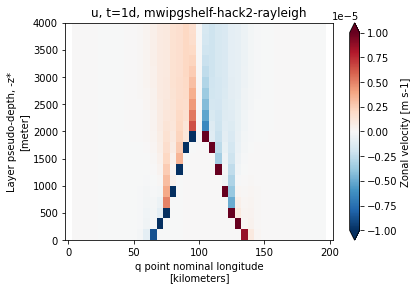

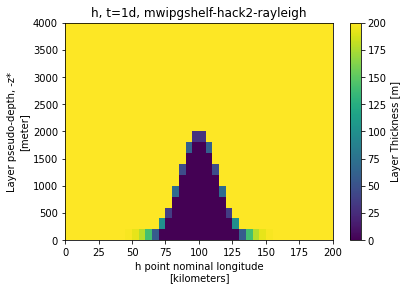

velocity at point zl = 1, xq = 14 = -1.1342103418359087e-05
h to left is 200.0
h to right is 97.702985267293
e at top to left is -200.0
e at top to right is -302.29701473270745
e at bottom to left is -400.0
e at bottom to right is -400.00000000000045
velocity at point zl = 2, xq = 15 = -4.914297010081505e-05
h to left is 199.99999999999997
h to right is 35.24816962692039
e at top to left is -400.00000000000045
e at top to right is -564.7518303730798
e at bottom to left is -600.0000000000005
e at bottom to right is -600.0000000000001
velocity at point zl = 4, xq = 16 = -2.3950102674928465e-05
h to left is 200.00000000000003
h to right is 68.91260640501964
e at top to left is -800.0000000000001
e at top to right is -931.08739359498
e at bottom to left is -1000.0000000000001
e at bottom to right is -999.9999999999997
velocity at point zl = 6, xq = 17 = -3.984262483416331e-05
h to left is 199.99999999999997
h to right is 45.32784122014974
e at top to left is -1199.9999999999995
e at top to

In [59]:
label = 'mwipgshelf-hack2-rayleigh'
prog = open_files(label)
prog.u.isel(yh = 0, Time = 24).plot(vmax = 1e-5)
plt.title('u, t=1d, '+label)
plt.show()
prog.h.isel(yh = 0, Time = 24).plot()
plt.title('h, t=1d, '+label)
plt.show()

us = prog.u.isel(yh = 0, Time = 24)#.values
hs = prog.h.isel(yh = 0, Time = 24)#.values
es = prog.e.isel(yh = 0, Time = 24)#.values

for i in np.arange(len(us.xq)):
    for k in np.arange(len(us.zl)):
        if (np.abs(us[k,i])>1e-5):
            print('velocity at point zl = '+str(k)+', xq = '+str(i)+' = '+str(us[k,i].values))
            print('h to left is '+str(hs[k,i-1].values))
            print('h to right is '+str(hs[k,i].values))
            print('e at top to left is '+str(es[k,i-1].values))
            print('e at top to right is '+str(es[k,i].values))
            print('e at bottom to left is '+str(es[k+1,i-1].values))
            print('e at bottom to right is '+str(es[k+1,i].values))
            

In [46]:
prog

<xarray.Dataset>
Dimensions:  (xq: 41, yh: 2, zl: 20, Time: 240, xh: 40, yq: 3, zi: 21)
Coordinates:
  * xq       (xq) float64 0.0 5.0 10.0 15.0 20.0 ... 185.0 190.0 195.0 200.0
  * yh       (yh) float64 32.5 37.5
  * zl       (zl) float64 100.0 300.0 500.0 700.0 ... 3.5e+03 3.7e+03 3.9e+03
  * Time     (Time) object 0001-01-01 01:00:00 ... 0001-01-11 00:00:00
  * xh       (xh) float64 2.5 7.5 12.5 17.5 22.5 ... 182.5 187.5 192.5 197.5
  * yq       (yq) float64 30.0 35.0 40.0
  * zi       (zi) float64 0.0 200.0 400.0 600.0 ... 3.6e+03 3.8e+03 4e+03
Data variables:
    u        (Time, zl, yh, xq) float64 nan -0.0008 -0.001552 ... -0.0001243 nan
    v        (Time, zl, yq, xh) float64 ...
    h        (Time, zl, yh, xh) float64 ...
    e        (Time, zi, yh, xh) float64 ...
    temp     (Time, zl, yh, xh) float32 ...
    salt     (Time, zl, yh, xh) float32 ...
    Rml      (Time, zl, yh, xh) float32 ...
Attributes:
    filename:   prog.nc
    title:      GOLD Experiment
    grid_type:  regular
    grid_tile:  N/A

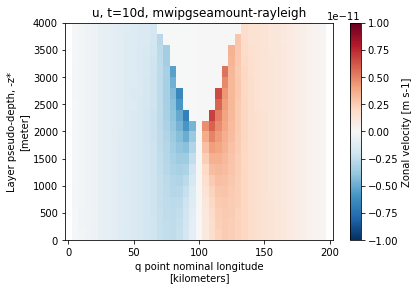

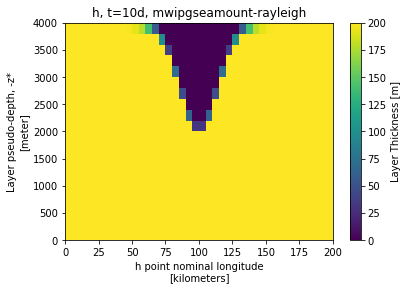

velocity at point zl = 15, xq = 16 = -5.418667746155271e-12
h to left is 200.00000000000006
h to right is 69.91362373188332
e at top to left is -3000.0000000000005
e at top to right is -3000.000000000001
e at bottom to left is -3200.0000000000005
e at bottom to right is -3069.9136237318844
velocity at point zl = 11, xq = 17 = -5.121576142979007e-12
h to left is 200.00000000000003
h to right is 199.99999999999991
e at top to left is -2200.000000000001
e at top to right is -2200.0
e at bottom to left is -2400.000000000001
e at bottom to right is -2400.0
velocity at point zl = 12, xq = 17 = -5.8014619715283716e-12
h to left is 200.00000000000009
h to right is 200.0000000000002
e at top to left is -2400.000000000001
e at top to right is -2400.0
e at bottom to left is -2600.000000000001
e at bottom to right is -2600.0
velocity at point zl = 13, xq = 17 = -6.550130831658278e-12
h to left is 200.0000000000001
h to right is 46.732307676536294
e at top to left is -2600.000000000001
e at top to 

In [70]:
label = 'mwipgseamount-rayleigh'
prog = open_files(label)
prog.u.isel(yh = 0, Time = -1).plot(vmax = 1e-11)
plt.title('u, t=10d, '+label)
plt.show()
prog.h.isel(yh = 0, Time = -1).plot()
plt.title('h, t=10d, '+label)
plt.show()

us = prog.u.isel(yh = 0, Time = -1)#.values
hs = prog.h.isel(yh = 0, Time = -1)#.values
es = prog.e.isel(yh = 0, Time = -1)#.values

for i in np.arange(len(us.xq)):
    for k in np.arange(len(us.zl)):
        if (np.abs(us[k,i])>5e-12):
            print('velocity at point zl = '+str(k)+', xq = '+str(i)+' = '+str(us[k,i].values))
            print('h to left is '+str(hs[k,i-1].values))
            print('h to right is '+str(hs[k,i].values))
            print('e at top to left is '+str(es[k,i-1].values))
            print('e at top to right is '+str(es[k,i].values))
            print('e at bottom to left is '+str(es[k+1,i-1].values))
            print('e at bottom to right is '+str(es[k+1,i].values))
            

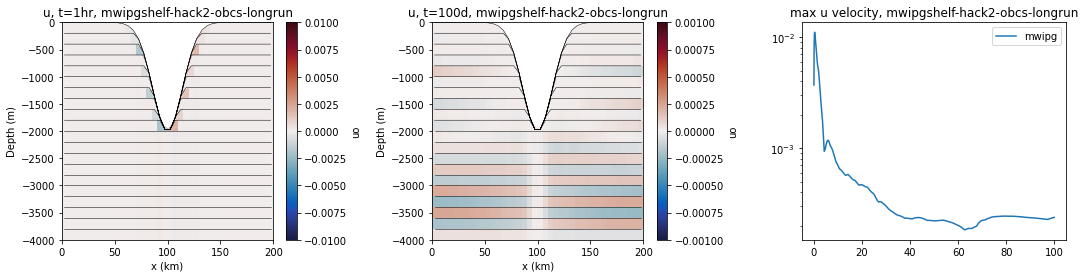

In [76]:
label = 'mwipgshelf-hack2-obcs-longrun'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.01,0.01,cm.cm.balance,ymax)
axes[0].set_title('u, t=1hr, '+label)

time = -1
plot(axes[1],x,time,0,prog.u,"uo",-0.001,0.001,cm.cm.balance,ymax)
axes[1].set_title('u, t=100d, '+label)

axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'mwipg')
axes[2].set_title('max u velocity, '+label)

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()


/Users/claireyung/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


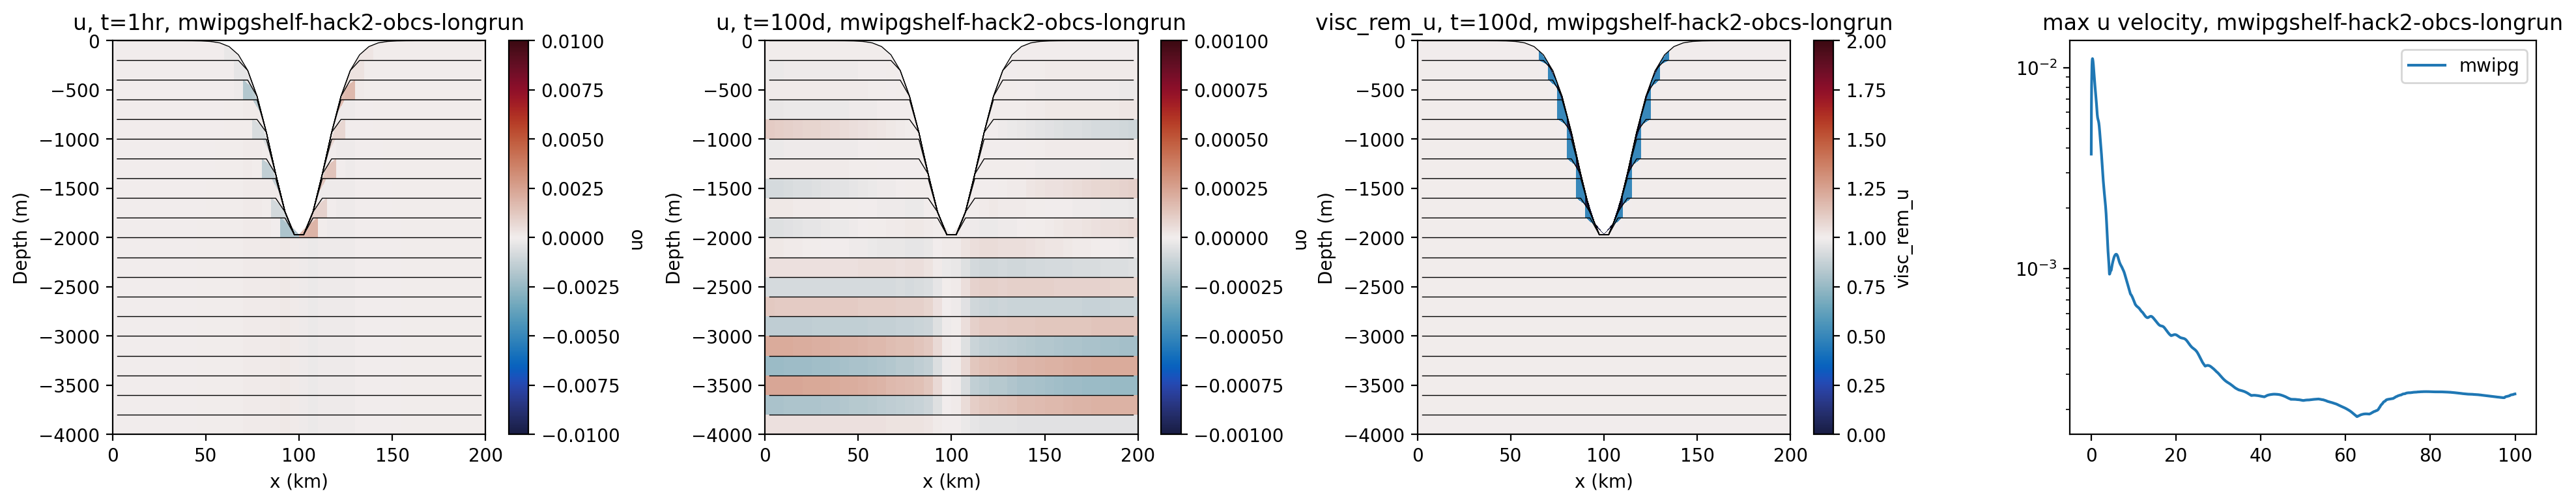

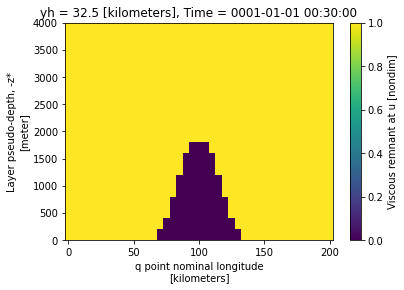

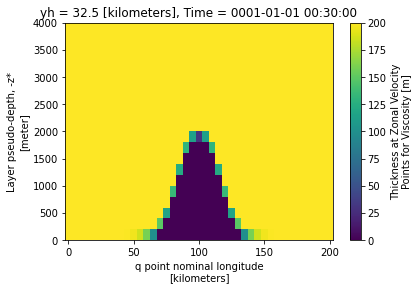

In [6]:
label = 'mwipgshelf-hack2-obcs-longrun'

fig, axes = plt.subplots(ncols = 4, figsize = (24,4),dpi=200)
prog = open_files(label)
IC = open_IC(label)
visc=open_visc(label)
x = 0
time = 0#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.01,0.01,cm.cm.balance,ymax)
axes[0].set_title('u, t=1hr, '+label)

time = -1
plot(axes[1],x,time,0,prog.u,"uo",-0.001,0.001,cm.cm.balance,ymax)
axes[1].set_title('u, t=100d, '+label)

plot(axes[2],x,time,0,visc.visc_rem_u,"visc_rem_u",0,2,cm.cm.balance,ymax)
axes[2].set_title('visc_rem_u, t=100d, '+label)


axes[3].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'mwipg')
axes[3].set_title('max u velocity, '+label)

axes[3].legend()
axes[3].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()

visc.visc_rem_u.isel(Time=0,yh=0).plot()
plt.show()
visc.Hu_visc.isel(Time=0,yh=0).plot()
plt.show()


/Users/claireyung/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


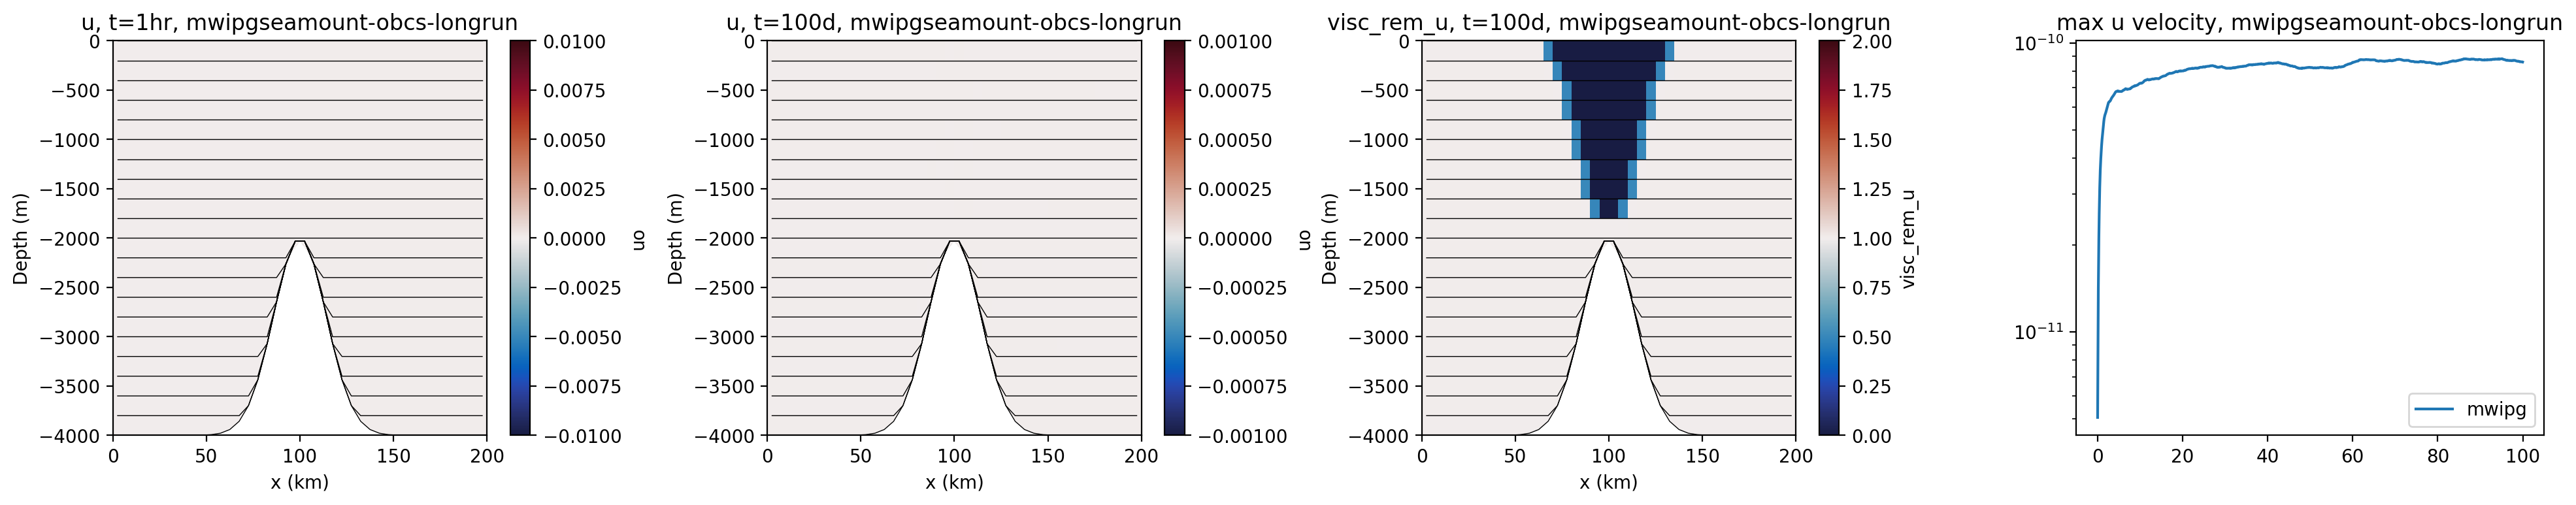

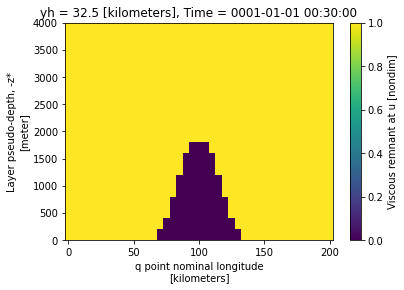

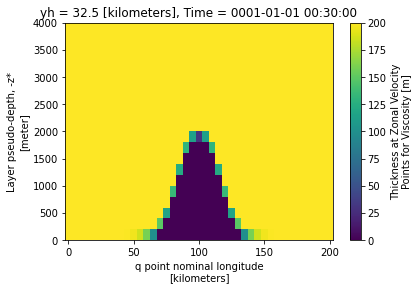

In [5]:
label = 'mwipgseamount-obcs-longrun'

fig, axes = plt.subplots(ncols = 4, figsize = (24,4),dpi=200)
prog = open_files(label)
IC = open_IC(label)
visc=open_visc(label)
x = 0
time = 0#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.01,0.01,cm.cm.balance,ymax)
axes[0].set_title('u, t=1hr, '+label)

time = -1
plot(axes[1],x,time,0,prog.u,"uo",-0.001,0.001,cm.cm.balance,ymax)
axes[1].set_title('u, t=100d, '+label)

plot(axes[2],x,time,0,visc.visc_rem_u,"visc_rem_u",0,2,cm.cm.balance,ymax)
axes[2].set_title('visc_rem_u, t=100d, '+label)


axes[3].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'mwipg')
axes[3].set_title('max u velocity, '+label)

axes[3].legend()
axes[3].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()

visc.visc_rem_u.isel(Time=0,yh=0).plot()
plt.show()
visc.Hu_visc.isel(Time=0,yh=0).plot()
plt.show()


Now do upside down seamount

# Try non-bouss vs bouss?

In [1]:
basee = '/Users/claireyung/mom6/MOM6-examples/ocean_only/ISOMIP/seamount-shelf/testing-nonboussvsbouss'
def open_files(label):
    base = basee 
    prog = xr.open_dataset(base + '/prog-'+label+'.nc')
    return prog
def open_IC(label):
    base = basee 
    IC = xr.open_dataset(base + '/MOM_IC-'+label+'.nc')
    return IC
def open_visc(label):
    base = basee 
    IC = xr.open_dataset(base + '/visc-'+label+'.nc')
    return IC
def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog = open_files(label)
    ocean_static = xr.open_dataset('ocean_geometry.nc')
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
    IC = open_IC(label)
    depth = grid.interp(prog.e,"x")
    lon = ocean_static.geolonb
    dataplot = variable

    xx = lon
    if (varname == "uo") or (varname == "PFu") or (varname == "visc_rem_u"): 
        dataplot = grid.interp(dataplot,"x")
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    #print(xi.shape)
    #print(yy[tt,...].shape)
    #print(dataplot[tt,:,yy0,:].shape)
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


Text(0.5, 0, 'time')

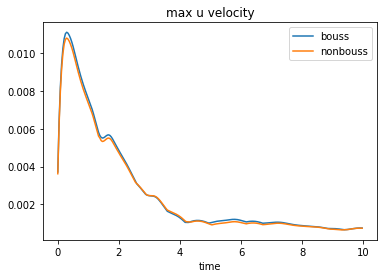

In [4]:
label = 'bouss'
prog = open_files(label)
plt.plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = label)
label = 'nonbouss'
prog = open_files(label)
plt.plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = label)

plt.title('max u velocity')
plt.legend()
plt.xlabel('time')

# mwipg on/off difference

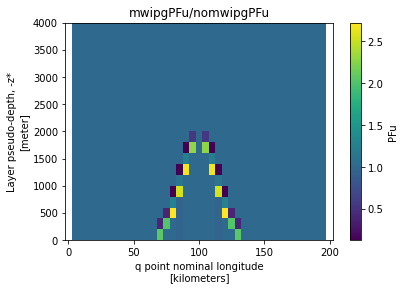

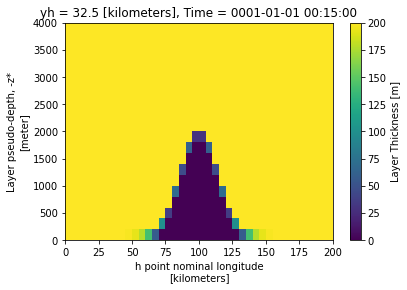

In [7]:
mwipgPFu = xr.open_dataset('mwipg-testing/mom-mwipg-zstar-short.nc').PFu
nomwipgPFu = xr.open_dataset('mwipg-testing/mom-nomwipg-zstar-short.nc').PFu

(mwipgPFu/nomwipgPFu).isel(yh = 0,Time = 0).plot()
plt.title('mwipgPFu/nomwipgPFu')
plt.show()

#mwipg/nomwipg > 1 implies PFu for mwipg bigger i.e. worse.

xr.open_dataset('mwipg-testing/prog-mwipg-zstar-short.nc').h.isel(yh = 0,Time = 0).plot()

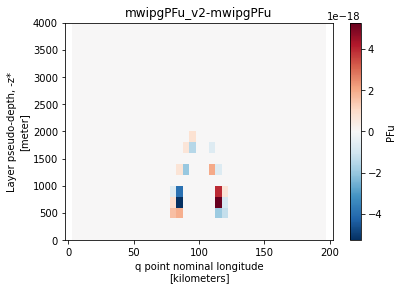

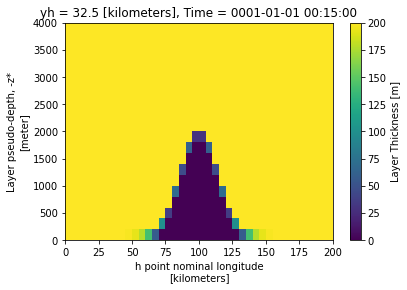

In [10]:
mwipgPFu = xr.open_dataset('mwipg-testing/mom-mwipg-zstar-short_v2.nc').PFu
nomwipgPFu = xr.open_dataset('mwipg-testing/mom-mwipg-zstar-short.nc').PFu

(mwipgPFu-nomwipgPFu).isel(yh = 0,Time = 0).plot()
plt.title('mwipgPFu_v2-mwipgPFu')
plt.show()

#mwipg/nomwipg > 1 implies PFu for mwipg bigger i.e. worse.

xr.open_dataset('mwipg-testing/prog-mwipg-zstar-short.nc').h.isel(yh = 0,Time = 0).plot()

So MWIPG better for some cells (finite h on both sides), no MWIPG better for cells with inifinitely small thickness on one side.

``` 
MWIPG = False
 k=10
 T_t  -1.8999999999999999       -1.8999999999999999     
 T_b  -1.8999999999999999       -1.8999999999999999     
 S_t   34.169548652069651        34.137500000000003     
 S_b   34.174999999999997        34.174999999999997     
 e  -1970.9261443714586       -1800.0000000000007       -2000.0000000000009       -2000.0000000000007     
 k=9
 T_t  -1.8999999999999999       -1.8999999999999999     
 T_b  -1.8999999999999999       -1.8999999999999999     
 S_t   34.169548652069643        34.126132387835966     
 S_b   34.169548652069643        34.137500000000003     
 e  -1970.9261443714577       -1739.3727351251421       -1970.9261443714586       -1800.0000000000007     
 etop  -1970.9261443714504       -1739.3727351251348     
 ebot  -4000.0000000000000       -4000.0000000000000     
 k=1,dpa  -7.4018527900238900E-012
 intz_dpal  -3.3659729479149473E-024
 intz_dpar  -15670.773134193936     
 intx_dpa  -254.17804786644132     
 pal  -19609.161267899035     
 par  -17675.421026196389     
 h(i+1,j,k) - h(i,j,k)   60.627264874857609     
 e(i+1,j,K+1) - e(i,j,K+1)   170.92614437145789     
 term1   1087283.2054640281     
 term2  -1086785.4495405999     
 term3   6.3745813166635242E-009
 hl   9.9999999999999998E-013
 hr   60.627264874858611     
 deltapah   1071612.4323298342     
 deltaintz   15670.773134193936     
 k=1,dpa  -235.83873210003406     
 intz_dpal  -3432.1337956684247     
 intz_dpar  -166599.99999999983     
 intx_dpa  -940.32070481672054     
 pal  -19609.161267899042     
 par  -18191.249999996082     
 h(i+1,j,k) - h(i,j,k)   170.92614437145767     
 e(i+1,j,K+1) - e(i,j,K+1)   2.2737367544323206E-013
 term1   3231303.9425038472     
 term2  -3229900.6217206987     
 term3   1.6871127824311030E-009
 hl   29.073855628542333     
 hr   200.00000000000000     
 deltapah   3068136.0762995156     
 deltaintz   163167.86620433140     
 PFu 11  -1.0393283657218740E-018  -5.7799855569648725E-016   1.0299537245509999E-015
 PFu 10  -1.4409711067408594E-018   2.3675604311010935E-006   1.0302171071141831E-015
 PFu 9  -9.7564433272897018E-019   3.1729856097434109E-006   4.6834892244794156E-006
 PFu 8  -9.7564433272897018E-019  -3.3819079666029899E-005   8.7581332563039760E-006

```

```
MWIPG = True
 k=10
 T_t  -1.8999999999999999       -1.8999999999999999     
 T_b  -1.8999999999999999       -1.8999999999999999     
 S_t   34.169548652069651        34.137500000000003     
 S_b   34.174999999999997        34.174999999999997     
 e  -1970.9261443714586       -1800.0000000000007       -2000.0000000000009       -2000.0000000000007     
 k=9
 T_t  -1.8999999999999999       -1.8999999999999999     
 T_b  -1.8999999999999999       -1.8999999999999999     
 S_t   34.169548652069643        34.126132387835966     
 S_b   34.169548652069643        34.137500000000003     
 e  -1970.9261443714577       -1739.3727351251421       -1970.9261443714586       -1800.0000000000007     
 etop  -1970.9261443714504       -1739.3727351251348     
 ebot  -4000.0000000000000       -4000.0000000000000     
 k=1,dpa  -7.4018527900238900E-012
 intz_dpal  -3.3659729479149473E-024
 intz_dpar  -15670.773134193936     
 intx_dpa  -257.91448689985032     
 pal  -19609.161267899035     
 par  -17675.421026196389     
 h(i+1,j,k) - h(i,j,k)   60.627264874857609     
 e(i+1,j,K+1) - e(i,j,K+1)   170.92614437145789     
 term1   1087283.2054640281     
 term2  -1086146.7944229404     
 term3   6.3745813166635242E-009
 hl   9.9999999999999998E-013
 hr   60.627264874858611     
 deltapah   1071612.4323298342     
 deltaintz   15670.773134193936     
 k=1,dpa  -235.83873210003406     
 intz_dpal  -3432.1337956684247     
 intz_dpar  -166599.99999999983     
 intx_dpa  -943.85234756113755     
 pal  -19609.161267899042     
 par  -18191.249999996082     
 h(i+1,j,k) - h(i,j,k)   170.92614437145767     
 e(i+1,j,K+1) - e(i,j,K+1)   2.2737367544323206E-013
 term1   3231303.9425038472     
 term2  -3230539.2768383590     
 term3   1.6871127824311030E-009
 hl   29.073855628542333     
 hr   200.00000000000000     
 deltapah   3068136.0762995156     
 deltaintz   163167.86620433140     
 PFu 11  -1.0393283657218740E-018  -5.7800015238292900E-016   1.0299583510355872E-015
 PFu 10  -1.4409711067408594E-018   1.2900772185313695E-006   1.0302171071141831E-015
 PFu 9  -9.7564433272897018E-019   7.2441445905678212E-006   6.1472286381495904E-007
 PFu 8  -9.7564433272897018E-019  -3.3819079666029899E-005   1.0764490374496181E-005
```